In [1]:
import numpy as np
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from perceptron import Perceptron
from layers.dense import Dense
from activations.relu import ReLU
from activations.sigmoid import Sigmoid
from losses.mse_loss import MSELoss
from optimizers.gradient_descent import OptimizerGD

In [3]:
X_cl, y_cl = make_classification(n_samples=200, n_features=4, random_state=42)
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, test_size=0.20)
X_train_cl = np.array(X_train_cl)
X_test_cl = np.array(X_test_cl)
y_train_cl = np.array(y_train_cl).reshape((len(y_train_cl),1))
y_test_cl = np.array(y_test_cl.reshape((len(y_test_cl),1)))
print(X_train_cl.shape)
print(X_test_cl.shape)
print(y_train_cl.shape)
print(y_test_cl.shape)

(160, 4)
(40, 4)
(160, 1)
(40, 1)


In [4]:
model = Perceptron()
model.add_layer(Dense(4, 16))
model.add_layer(ReLU())
model.add_layer(Dense(16, 1))
model.add_layer(Sigmoid())
model.set_loss(MSELoss(stopping_criterion=0.01))
model.set_optimizer(OptimizerGD(0.001))

In [5]:
cl_history = model.fit(200, X_train_cl, y_train_cl, False)
y_pred_cl = model.predict(X_test_cl)
y_pred_cl = np.round(y_pred_cl)
acc = sklearn.metrics.accuracy_score(y_test_cl, y_pred_cl)
prec = sklearn.metrics.precision_score(y_test_cl, y_pred_cl)
recall = sklearn.metrics.recall_score(y_test_cl, y_pred_cl)
f1 = sklearn.metrics.f1_score(y_test_cl, y_pred_cl)
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.625
Precision: 0.5806451612903226
Recall: 0.9
F1 score: 0.7058823529411765


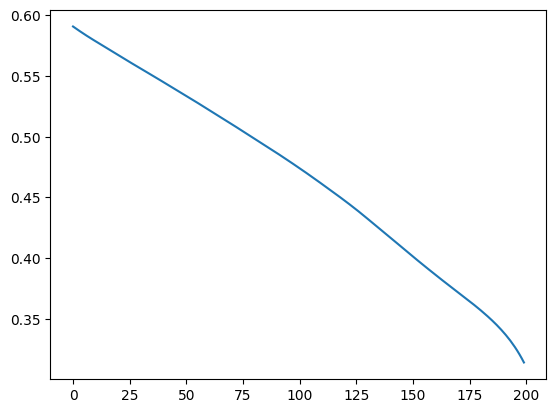

In [6]:
plt.plot(cl_history)